# Data Science I - Projeto final

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [26]:
df = pd.read_csv('titanic-data-6.csv')

# Preparar dados (Wrangle data)

## Avaliação dos dados

Consultar o formato do dataframe, número de linhas e colunas.

In [27]:
df.shape

(891, 12)

Consultar as primeiro cinco linhas do dataframe.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Consultar informações como número de entradas, colunas e seus tipos de dados.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Verificar a existência de linhas duplicados.

In [6]:
df.duplicated().sum()

0

Verificar se há nomes repetidos

In [7]:
df['Name'].duplicated().sum()

0

Verificar variedade de registros únicos em gênero (Sex)

In [8]:
df['Sex'].nunique()

2

In [9]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

Verificar variedade de registros únicos em sobreviventes (Survived)

In [10]:
df['Survived'].nunique()

2

In [28]:
df['Survived'].unique()

array([0, 1], dtype=int64)

Substituição dos valores de sobreviventes de 0, 1 para 'Não' e 'Sim', respectivamente

In [29]:
survived = {'0':'Não', '1':'Sim'}
df['Survived'] = df['Survived'].astype(str).replace(survived.keys(),survived.values())

In [30]:
df['Survived'].head()

0    Não
1    Sim
2    Sim
3    Sim
4    Não
Name: Survived, dtype: object

Verificar se existe valores nulos

In [31]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Foram encontrados valores nulos nas colunas 'Age', 'Cabin' e 'Embarked'

Preenchimento de valores nulos em idade com seu valor médio

In [32]:
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

Verificar os registros nulos em local de embarque (Embarked)

In [33]:
df['Embarked'].isnull().sum()

2

In [35]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,Sim,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,Sim,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Verificar se existe passageiros sem local de embarque marcados como não sobreviventes

In [34]:
df[df['Survived'] == 'Não']['Embarked'].isnull().any().sum()

0

Por não existir passageiros sem local de embarque marcado como não sobrevivente todos serão removidos, considerando que estes não estavam a bordo

In [36]:
df.dropna(subset=['Embarked'], inplace=True)

Validar a remoção de passageiros sem local de embarque

In [38]:
df['Embarked'].isnull().any().sum()

0

In [37]:
df.shape

(889, 12)

Substituição do nome dos locais de embarque abreviados pelo nome completo

In [39]:
embarked_places = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
df['Embarked'].replace(embarked_places.keys(), embarked_places.values(), inplace=True)

Declaração da função para categorizar idade

Categorização das idades no dataframe

In [40]:
ages = [0, 15, 25, 65, np.inf]
ages_categories = ['Criança', 'Jovem', 'Adulto', 'Idoso']

df['AgeCategory'] = pd.cut(df['Age'], bins=ages, labels=ages_categories,right=True)

Exibição do cabeçalho para verificar resultado das mudanças

In [43]:
df['AgeCategory'].unique()

[Jovem, Adulto, Criança, Idoso]
Categories (4, object): [Criança < Jovem < Adulto < Idoso]

Declaração de função para imprimir em Markdown

# Explorar (Explore)

Matriz de gráficos de dispersão para ideias

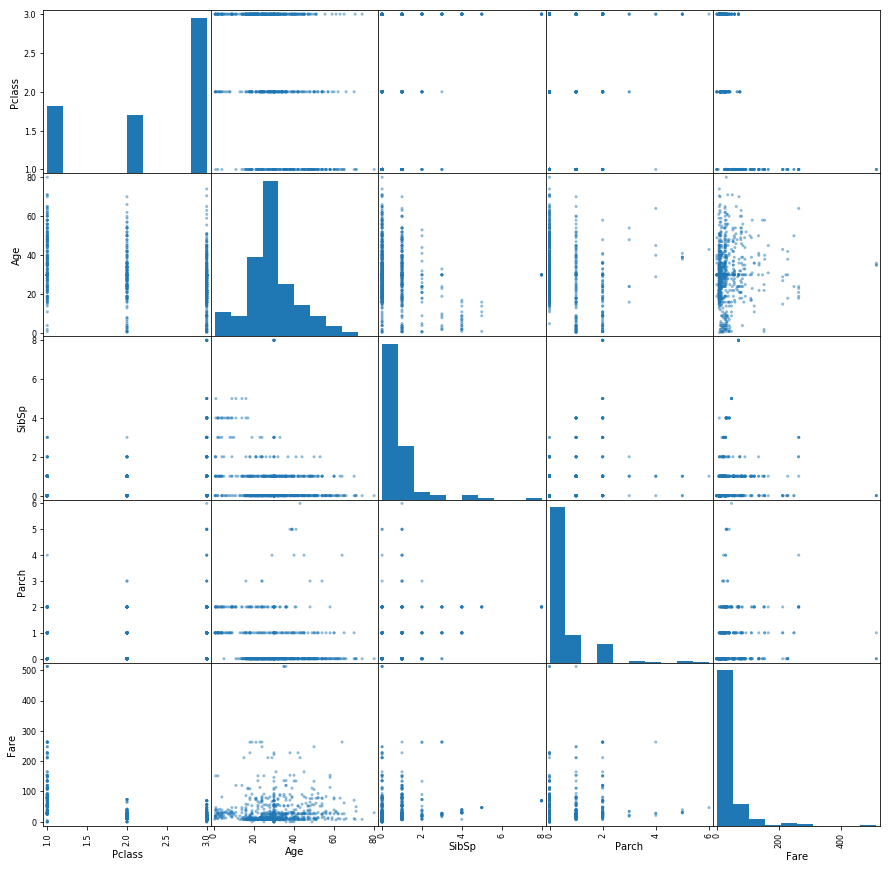

In [44]:
pd.plotting.scatter_matrix(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], figsize=(15,15));

Histograma do conjunto de dados

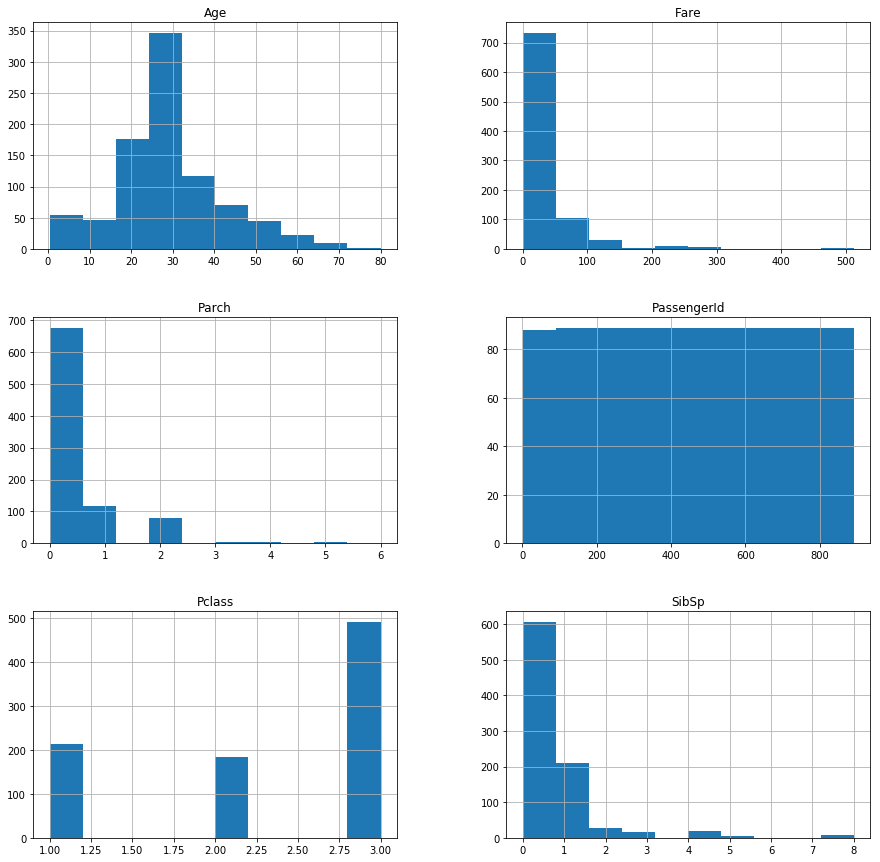

In [45]:
df.hist(figsize=(15,15));

Definir estilo padrão para os gráficos com Seaborn

In [46]:
sns.set_style('whitegrid')

Definição de função criar plot figure com título

In [47]:
def create_figure(title):
    """
        Criar uma figure com titulo posicionado
        
        Args:
            title (String): Valor a ser preenchido no título do gráfico 
            
        Return:
            (plt.Figure) Retorna uma Figure para adicionar gráficos (Plots)
    """
    fig = plt.figure(title)
    fig.suptitle(title, fontsize='x-large', horizontalalignment='center', verticalalignment='bottom')
    plt.subplots_adjust(top=.9)
    plt.tight_layout()
    fig.set_figwidth(10)
    
    return fig


## 1. Quantos sobreviveram e quantos morreram?
Exibir gráfico de sobreviventes

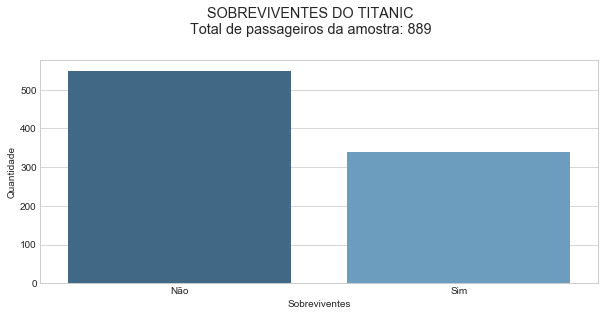

In [49]:
def plot_survivors():
    """
        Gerar os gráficos de frequência e proporção dos sobreviventes
    """
    title = 'SOBREVIVENTES DO TITANIC\nTotal de passageiros da amostra: {count}'.format(count=df.shape[0])
    
    fig = create_figure(title)
    ax = fig.add_subplot(111)
    #     ax2 = fig.add_subplot(1,2,2)

    # Gerar os gráficos com seaborn
    sns.countplot(data=df, x='Survived', ax=ax, palette='Blues_d')

    # Definição dos títulos
    ax.set_xlabel('Sobreviventes')
    ax.set_ylabel('Quantidade')    

plot_survivors()

Tabela de contagem e proporção de sobreviventes e mortes

In [68]:
def table_survivors():
    """
        Exibir tabela com contagem de sobreviventes
        
        Return (dataframe)
    """
    # Definição do dataframe de proporções
    df_survivors = df['Survived'].value_counts().reset_index()
    df_survivors['Proportion'] = df_survivors['Survived'].apply(lambda value: value / df.shape[0])

    return df_survivors

In [67]:
table_survivors()

,index,Survived,Proportion
0,Não,549,0.617548
1,Sim,340,0.382452


## 2. Qual a média de idade entre os sobreviventes?

In [74]:
def table_survivors_age_mean():
    df_surv_age = df.query('Survived == "Sim"')
    
    return df_surv_age['Age']

table_survivors_age_mean().mean()

28.469617647058822

In [ ]:
def plot_survivors_age_mean():
    

plot_survivors_age_mean()

### Sobreviventes por gênero e classe

In [ ]:
# Contagem e proporção de sobreviventes por gênero e classe
df_surv_by_sex = df.groupby(['Pclass', 'Sex', 'Survived']).count()['PassengerId'].reset_index()
df_surv_by_sex.rename(columns={'PassengerId':'Count'}, inplace=True)

def calculate_surv_proportion(row):
    total = df.query('Sex == "{sex}" and Pclass == "{pclass}"'.format(sex = row['Sex'], pclass = row['Pclass']))['Sex'].count()
    return (row['Count'] / total)

df_surv_by_sex['Proportion'] = df_surv_by_sex.apply(lambda row: calculate_surv_proportion(row), axis=1)

df_surv_by_sex.sort_values(['Sex'], ascending=False)

In [ ]:
def segunda_analise():
    ax_by_class = sns.factorplot(data=df_surv_by_sex.sort_values(['Sex'], ascending=False), x='Survived', y='Proportion', hue='Sex', col='Pclass', kind='bar', palette='Blues_d')
    ax_by_class.set_titles('Class {col_name}');

segunda_analise()

In [ ]:
# CONCLUSÃO
conclusions.append((
    'Quais são as características do maior grupo de sobreviventes?',
    'De acordo com o gráfico e os dados de sobreviventes por gênero e classe, as mulheres da primeira classe apresentaram maiores chances, com 96,8% de sobreviventes, seguida das mulheres da segunda classe com proporção de 92,1% e da terceira com 50% de sobreviventes.'
))

### Sobrevivents por local de embarque

In [ ]:
ax_by_class = sns.factorplot(data=df, x='Survived', hue='Sex', col='Embarked', kind='count', palette='Blues_d')
ax_by_class.set_titles('{col_name}');

### Local de embarque por classe e gênero

In [ ]:
ax_by_class = sns.factorplot(data=df, x='Pclass', hue='Sex', col='Embarked', kind='count', palette='Blues_d')
ax_by_class.set_titles('{col_name}');

### Contagem de pessoas por gênero e classe

In [ ]:
ax_by_class = sns.factorplot(data=df, x='Sex', col='Pclass', kind='count', palette='Blues_d')
ax_by_class.set_titles('Class {col_name}');

### Classificação de idade por classe, local de embarque e sobreviventes

In [ ]:
ax_by_class = sns.factorplot(data=df, x='AgeCategory', hue='Survived', col='Embarked', kind='count', palette='Blues_d')
ax_by_class.set_titles('{col_name}');

In [ ]:
ax_by_class = sns.factorplot(data=df, x='AgeCategory', hue='Sex', col='Embarked', kind='count', palette='Blues_d')
ax_by_class.set_titles('{col_name}');

In [ ]:
def terceira_analise_1():
    ax_by_class = sns.factorplot(data=df, x='AgeCategory', hue='Survived', col='Pclass', kind='count', palette='Blues_d')
    ax_by_class.set_titles('Class {col_name}');

terceira_analise_1()

In [ ]:
def terceira_analise_2():
    # Avaliação de distribuição e densidade de idade por classe e gênero
    fig, ax = plt.subplots(figsize=(12,12))
    sns.violinplot(data=df, ax=ax, x='Pclass', y='Age', col='Pclass', hue='Sex', split=True, inner='quart', palette='Blues_d')
    
    df_age = df['AgeCategory'].value_counts().reset_index()
    df_age['Proportions'] = df['AgeCategory'].value_counts(normalize=True).reset_index()['AgeCategory']
    return df_age    
    
terceira_analise_2()

In [ ]:
def terceira_analise_3():
    return df.groupby('Sex')['Age'].describe()

terceira_analise_3()

In [ ]:
# CONCLUSÃO
conclusions.append((
    'Qual é a descrição de idade dos passageiros?',
    'Para os homens, a idade máxima era de 80 anos, com média em 30 anos e a mínima em 0.4 anos (4,8 meses). No que diz as mulheres, a idade máxima era de 63 anos, média em 28 anos e a mínima em 0.75 ano (9 meses). Em ambos os gêneros, 75% se encaixam em 35 anos, que é possível ver a predominância de pessoas entre 20 e 40 anos no gráfico em violino'
))

In [ ]:
df_surv_by_agecategory = None

def quarta_analise_1():
    df_surv_by_agecategory = df[['Pclass','AgeCategory', 'Survived']].groupby(['Pclass', 'AgeCategory', 'Survived'])['Survived'].agg(['count'])
    return df_surv_by_agecategory
    
df_surv_by_agecategory = quarta_analise_1()
df_surv_by_agecategory

In [ ]:
def quarta_analise_2():
    # Crianças Sobreviventes 
    return df_surv_by_agecategory.query('AgeCategory == "Children"').groupby('Survived').sum()

quarta_analise_2()

In [ ]:
# CONCLUSÃO
conclusions.append((
    'Quantas crianças estavam a bordo? Quantas sobrevieram e quantas morreram?',
    'Haviam 78 crianças a bordo (8,7%) e dessas, 45 sobreviveram e 33 morreram.'
))

### Contagem de familiares (Pais/Filhos) por classe

In [ ]:
ax_by_class = sns.factorplot(data=df, x='Parch', col='Pclass', kind='count', palette='Blues_d')
ax_by_class.set_titles('Class {col_name}');

### Contagem de irmãos/cônjuges por classe

In [ ]:
ax_by_class = sns.factorplot(data=df, x='SibSp', col='Pclass', kind='count', palette='Blues_d')
ax_by_class.set_titles('Class {col_name}');

### Avaliação conjunta de famílias (irmãos ou conjuges e pais ou filhos)

In [ ]:
df_parch_sibsp = df.groupby('Pclass')[['Parch', 'SibSp']].agg(['mean', 'count', 'max', 'sum']).reset_index()

df_parch = df.query('Parch > 0')[['Pclass', 'Parch']].groupby('Pclass').count().reset_index()
df_sibsp = df.query('SibSp > 0')[['Pclass', 'SibSp']].groupby('Pclass').count().reset_index()

In [ ]:
# Definir novos indexes
index_columns =[]
for names in df_parch_sibsp.columns.ravel():
    if(names[-1]):
        index_columns.append('{}_{}'.format(names[0], names[-1]))
    else:
        index_columns.append(names[0])

df_parch_sibsp.columns = index_columns

In [ ]:
# Criação de um dataframe com as proporções de passageiros com pais ou filhos e também irmãos ou conjuges.
df_parch_sibsp['Parch_proportion'] = df_parch['Parch'] / df_parch_sibsp['Parch_count']
df_parch_sibsp['SibSp_proportion'] = df_sibsp['SibSp'] / df_parch_sibsp['SibSp_count']

In [ ]:

def quinta_analise_1():
    sns.factorplot(data=df_parch_sibsp, x='Pclass', y='Parch_proportion', kind='bar', palette='Blues_d');
    
    return df_parch_sibsp
    
quinta_analise_1()

In [ ]:
def quinta_analise_2():
    sns.factorplot(data=df_parch_sibsp, x='Pclass', y='SibSp_proportion', kind='bar', palette='Blues_d')
    
quinta_analise_2()

In [ ]:
# CONCLUSÃO
conclusions.append((
        'Em qual classe havia mais familiares?',
        'É possível identificar que a segunda classe apresentou maiores grupos familiares de pais/filhos com 27,1% e a primeira classe na relação de irmãos/conjuges com 36,5%.'
))

## Perguntas e conclusões   

In [ ]:
for index, conclusion in enumerate(conclusions, start=1):
    print('{index}. {pergunta}\n\n\t{resposta}\n\n'.format(index=index, pergunta=conclusion[0], resposta=conclusion[1]))

# TITANIC - Um breve olhar sobre seu naufrágio

Mesmo após um século de seu naufrágio, que ocorreu em 1912, o Titanic é considerado um dos maiores desastres marítimos em tempos de paz. Sua história rendeu livros, filmes e diversos documentarios que buscam explorar e levar informações e curiosidades ao público.

Nesse mesmo sentido, com o objetivo de aplicar conhecimentos do curso de Data Science do Udacity, este projeto irá explorar um conjunto de dados disponibilizado na etapa final através do [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv).


# Perguntas

Perguntas elaboradas ao conhecer o conjunto de dados fornecido:

## 1. Quais são os números de sobreviventes?
    
A primeira pergunta buscou conhecer o tamanho da tragédia. Quantas pessoas sobreviveram, quantas vidas foram perdidas, qual o tamanho da amostra. Nesse sentido busquei a descrição do conjunto de dados e a exibição de grafícos de frequência e proporção para sobreviventes e mortes.

## 2. Quais são as características do maior grupo de sobreviventes?
    
Com o propósito de conhecer melhor sobre os sobreviventes e mortos os dividi em grupos de gênero, classe, local de embarque, com o propósito de encontrar qual grupo apresentava maior taxa de sobrevivência. Explorando suas descrições, normalizações e gráficos de frequência.

## 3. Qual é a descrição de idade dos passageiros?
    
Dentre a amostra fornecida, qual é a idade? Como poderia classifica-los, quais eram as faixas etárias, qual a idade mais presente entre eles? Qual era a idade da pessoa mais velha, e a mais nova? Para isso, os dados foram agrupados por classe, faixa etária e gênero e posteriormente explora-los.

## 4. Quantas crianças estavam a bordo? Quantas sobrevieram e quantas morreram?
    
Crianças, quantas eram? Sobreviveram? Qual é o balanço? Utilizando também da classificação de faixa etaria, foi possível mapear as crianças, idades e o balanço de sobreviventes.

## 5. Em qual classe haviam mais familiares? (Irmãos, conjuges, pais, filhos)
    
Após explorar os dados sobre as crianças, busquei relacionar quais dados poderiam relacionar famílias a bordo, irmãos ou conjuges e pais ou filhos. Contando e normalizando informações sobre as pessoas que apresentavam ao menos um relacionamento familiar nos campos disponíveis.




# Resumo

## 1. Quais são os números de sobreviventes?

In [ ]:
primeira_analise()

In [ ]:
print(conclusions[0][1])

## 2. Quais são as características do maior grupo de sobreviventes?

In [ ]:
segunda_analise()

In [ ]:
print(conclusions[1][1])

## 3. Qual é a descrição de idade dos passageiros?

In [ ]:
terceira_analise_1()

In [ ]:
terceira_analise_2()

In [ ]:
terceira_analise_3()

In [ ]:
print(conclusions[2][1])

## 4. Quantas crianças estavam a bordo? Quantas sobrevieram e quantas morreram?

In [ ]:
quarta_analise_1()

In [ ]:
quarta_analise_2()

In [ ]:
print(conclusions[3][1])

## 5. Em qual classe haviam mais familiares? (Irmãos, conjuges, pais, filhos)¶

In [ ]:
quinta_analise_1()

In [ ]:
quinta_analise_2()

In [ ]:
display(Markdown(conclusions[4][1]))


# Limpeza de dados

O primeiro passo foi listar os tipos de dados utilizados e se havia campos nulos. Feito isso, foi constatado que haviam campos nulos em Idade (Age), Local de embarcação (Embarked) e Identificação da cabine (Cabin). 
Assim:
- Os campos com idade nula foram preenchidos com o valor da média;
- Foi feita uma pesquisa pelos passageiros que não possuiam local de embaração e consultado seu status de sobrevivente ou não e foi constatado que nenhum havia morrido. Nesse sentido, foi considerado de que não estavam a bordo e seus registros removidos;
- Cabin foi mantido nulo, pois diante do quadro de informações disponíveis, não apresentava potencial informativo, poderia ser descartado;
- As abreviações dos locais de embaração foram substituidos pelo nome completo;
- Foram criadas categorias para faixa etária;


# Consultas e referências

- [Seaborn API documentation](https://seaborn.pydata.org/api.html)
- [Stack Overflow: Pandas](https://stackoverflow.com/questions/tagged/pandas)
- [Stack Overflow: Seaborn](https://stackoverflow.com/questions/33524694/plotting-with-seaborn)
